## Tutorial: MCMC

In [ ]:
#| hide
#skip
! [ -e /content ] && pip install -Uqq pyndamics3 emcee # upgrade pyndamics3 on colab

In [ ]:
%matplotlib inline
from pylab import *

In [ ]:
from sie.mcmc import StatsModel

In [ ]:
x=randn(100)*5+1.2
model=StatsModel()
model.add_data(x=x)
model.add("m ~ Normal(0,10)")
model.add("x ~ Normal(m,1)")
model.initialize()

Sampling Prior...
Done.
0.19 s
Running MCMC 1/2...
Done.
0.96 s
Samples
Running MCMC 2/2...
Done.
0.96 s
Samples
figsize [6.4, 4.0]


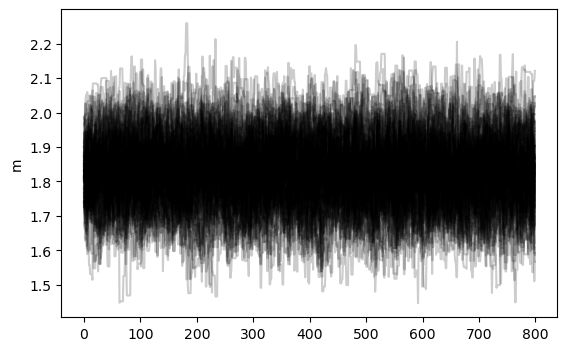

In [ ]:
model.run_mcmc(800,repeat=2)
model.plot_chains()

In [ ]:
print(model.function_str)

def _lnprior(θ,slices,extra={}):
    m=θ[slices.m]

    _value=0

    _value+=Normal(0,10)(m)

    return _value


def _init_prior(nwalkers,ndim,data,slices,extra={}):
    x=data['x']

    _pos=np.zeros((nwalkers,ndim))
    m=_pos[:,slices.m]=init_Normal(0,10)(nwalkers)

    return _pos


def _lnlikelihood(θ,data,slices,extra={}):
    x=data['x']

    m=θ[slices.m]


    _value=0

    _value+=Normal(m,1)(x)

    return _value.sum()



[('m', 0, array([1.62660519, 1.82677733, 2.02529205]))]

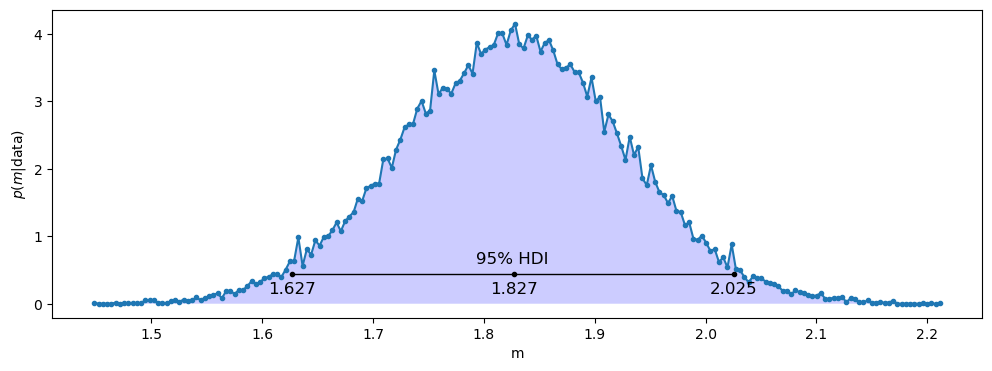

In [ ]:
model.plot_distributions()

In [ ]:
xy1="""
X	Y
10	8.04
8	6.95
13	7.58
9	8.81
11	8.33
14	9.96
6	7.24
4	4.26
12	10.84
7	4.82
5	5.68
"""
xy=xy1
x,y=array([_.split() for _ in xy.strip().split('\n')[1:]],dtype=float).T
x,y

(array([10.,  8., 13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5.]),
 array([ 8.04,  6.95,  7.58,  8.81,  8.33,  9.96,  7.24,  4.26, 10.84,
         4.82,  5.68]))

In [ ]:
model=StatsModel()
model.add_data(x=x,y=y)
model.add("m ~ Normal(0,10)")
model.add("b ~ Normal(0,10)")
model.add("σ ~ Jeffreys()")
model.add("y ~ Normal(m*x+b,σ)")
model.initialize()
model


Parameters
----------
    {'m': m, 'b': b, 'σ': σ}
Extra
-----
    []
Data
----
    ['x', 'y']
Prior
-----
    ['m ~ Normal(0,10)', 'b ~ Normal(0,10)', 'σ ~ Jeffreys()']
Likelihood
----------
    []
Data Parameters
---------------
    ['y ~ Normal(m*x+b,σ)']
        

In [ ]:
print(model.function_str)

def _lnprior(θ,slices,extra={}):
    m=θ[slices.m]
    b=θ[slices.b]
    σ=θ[slices.σ]

    _value=0

    _value+=Normal(0,10)(m)
    _value+=Normal(0,10)(b)
    _value+=Jeffreys()(σ)

    return _value


def _init_prior(nwalkers,ndim,data,slices,extra={}):
    x=data['x']
    y=data['y']

    _pos=np.zeros((nwalkers,ndim))
    m=_pos[:,slices.m]=init_Normal(0,10)(nwalkers)
    b=_pos[:,slices.b]=init_Normal(0,10)(nwalkers)
    σ=_pos[:,slices.σ]=init_Jeffreys()(nwalkers)

    return _pos


def _lnlikelihood(θ,data,slices,extra={}):
    x=data['x']
    y=data['y']

    m=θ[slices.m]
    b=θ[slices.b]
    σ=θ[slices.σ]


    _value=0

    _value+=Normal(m*x+b,σ)(y)

    return _value.sum()



Sampling Prior...
Done.
0.36 s
Running MCMC 1/3...
Done.
1.67 s
Samples
Running MCMC 2/3...
Done.
1.70 s
Samples
Running MCMC 3/3...
Done.
1.68 s
Samples
figsize [6.4, 12.0]


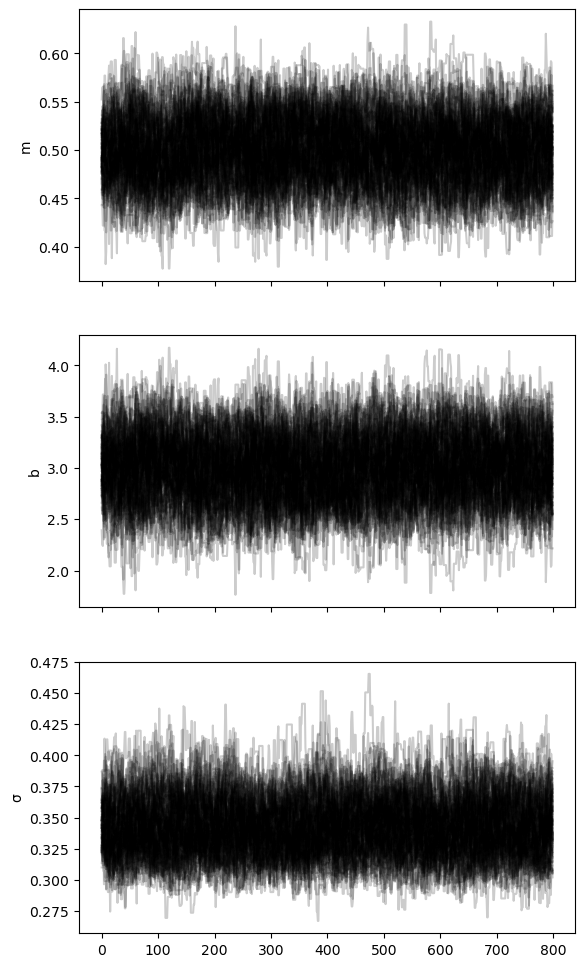

In [ ]:
model.run_mcmc(800,repeat=3)
model.plot_chains()

In [ ]:
model.best_estimates()

{'m': array([[0.46738459],
        [0.50059442],
        [0.53267192]]),
 'b': array([[2.68670806],
        [2.99528253],
        [3.30913715]]),
 'σ': array([[0.3198193 ],
        [0.34048619],
        [0.36406975]])}

figsize [6.4, 4.0]


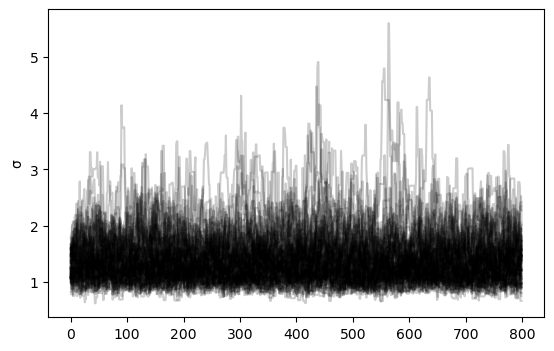

In [ ]:
model.plot_chains('σ')

[('m', 0, array([0.23000857, 0.49408121, 0.75795318])),
 ('b', 0, array([-19.23119668,   0.19117274,  19.78719569])),
 ('σ', 0, array([0.84989523, 1.27376011, 2.2812473 ])),
 ('res', 0, array([-22.4945042 ,  -2.89774976,  16.88040392]))]

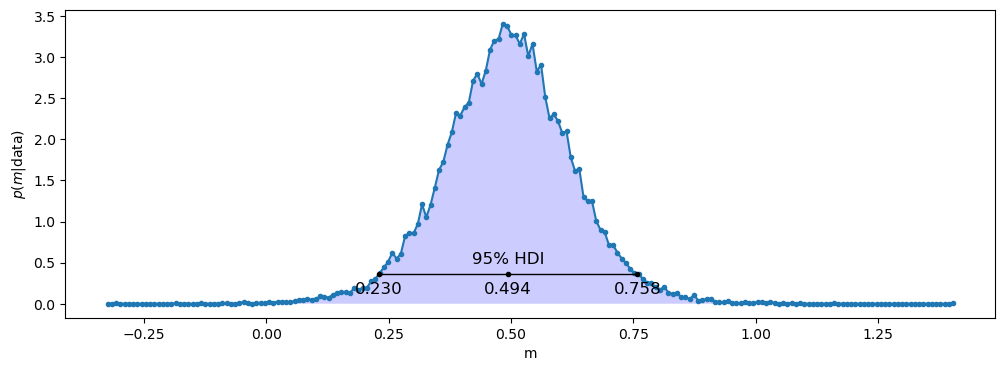

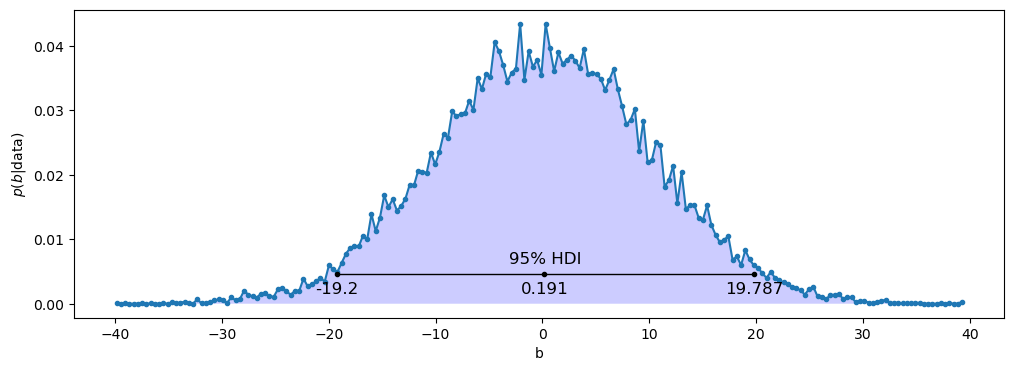

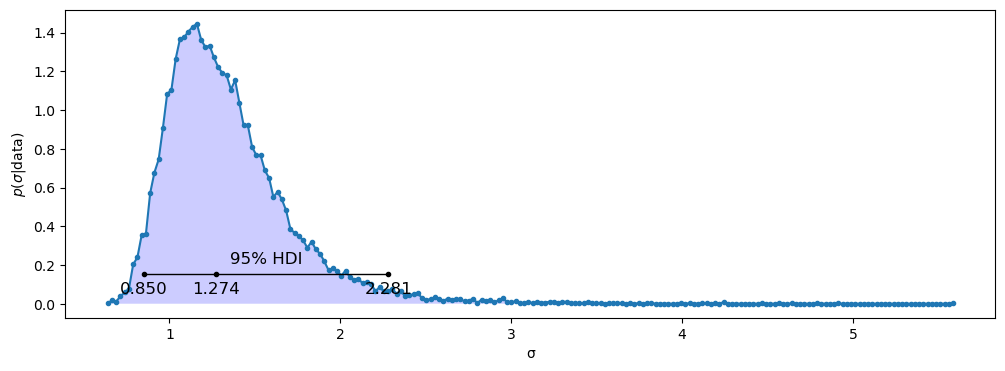

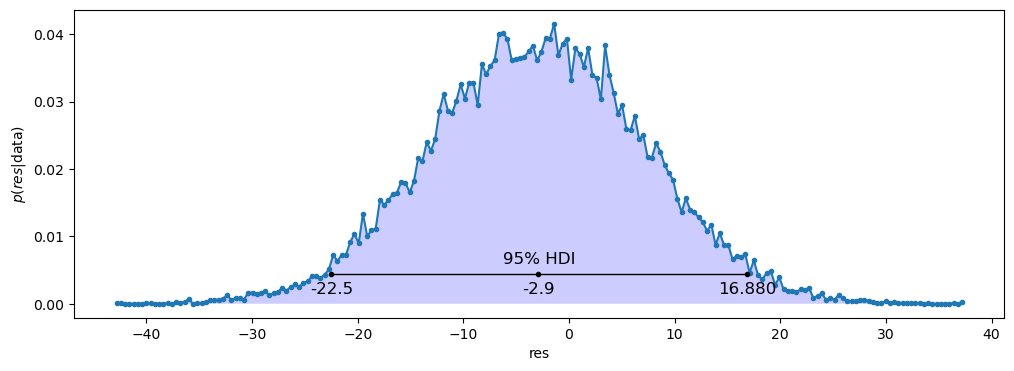

In [ ]:
model.plot_distributions()

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()